In [1]:
import os
import os.path
import torch

import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.utils.data as data

from time import time
from PIL import ImageFile

from csfnst.fastneuralstyle.networks import StylizedNet, BottleneckType

from csfnst.utils import load_image, plot_image_tensor, save_image_tensor

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
force_cpu = True

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() and not force_cpu else 'cpu')

In [4]:
checkpoints_path = '../checkpoints/'
style_name = 'wescoat'
tv = '1ne5'
networks = [
    (
        'candy',
        StylizedNet(
            channel_multiplier=32, 
            bottleneck_size=5, 
            bottleneck_type=BottleneckType.RESIDUAL_BLOCK,
            intermediate_activation_fn='PReLU',
            final_activation_fn='Hardtanh'
        ),
        True
    ),
    (
        'candy_2',
        StylizedNet(
            channel_multiplier=32, 
            bottleneck_size=5, 
            bottleneck_type=BottleneckType.RESIDUAL_BLOCK,
            intermediate_activation_fn='PReLU',
            final_activation_fn='Hardtanh'
        ),
        True
    ),
    (
        'starry_night',
        StylizedNet(
            channel_multiplier=32, 
            bottleneck_size=5, 
            bottleneck_type=BottleneckType.RESIDUAL_BLOCK,
            intermediate_activation_fn='PReLU',
            final_activation_fn='Hardtanh'
        ),
        True
    ),
    (
        'the_scream',
        StylizedNet(
            channel_multiplier=32, 
            bottleneck_size=5, 
            bottleneck_type=BottleneckType.RESIDUAL_BLOCK,
            intermediate_activation_fn='PReLU',
            final_activation_fn='Hardtanh'
        ),
        True
    ),
    (
        'wescoat_peintrneusa',
        StylizedNet(
            channel_multiplier=32, 
            bottleneck_size=5, 
            bottleneck_type=BottleneckType.RESIDUAL_BLOCK,
            intermediate_activation_fn='PReLU',
            final_activation_fn='Hardtanh'
        ),
        True
    ),
    (
        'mosaic_of_trees',
        StylizedNet(
            channel_multiplier=32, 
            bottleneck_size=5, 
            bottleneck_type=BottleneckType.RESIDUAL_BLOCK,
            intermediate_activation_fn='PReLU',
            final_activation_fn='Hardtanh'
        ),
        True
    ),
    (
        'shipwreck',
        StylizedNet(
            channel_multiplier=32, 
            bottleneck_size=5, 
            bottleneck_type=BottleneckType.RESIDUAL_BLOCK,
            intermediate_activation_fn='ReLU6',
            final_activation_fn='Hardtanh'
        ),
        True
    ),
    (
        'seated_nude',
        StylizedNet(
            channel_multiplier=32, 
            bottleneck_size=5, 
            bottleneck_type=BottleneckType.RESIDUAL_BLOCK,
            intermediate_activation_fn='PReLU',
            final_activation_fn='Hardtanh'
        ),
        True
    ),
    (
        'the_old_guitarist',
        StylizedNet(
            channel_multiplier=32, 
            bottleneck_size=5, 
            bottleneck_type=BottleneckType.RESIDUAL_BLOCK,
            intermediate_activation_fn='PReLU',
            final_activation_fn='Hardtanh'
        ),
        True
    ),
    (
        'bread_and_fruit_dish_on_a_table',
        StylizedNet(
            channel_multiplier=32, 
            bottleneck_size=5, 
            bottleneck_type=BottleneckType.RESIDUAL_BLOCK,
            intermediate_activation_fn='PReLU',
            final_activation_fn='Hardtanh'
        ),
        True
    )
]

networks = [
    {
        'file': network[0],
        'model': network[1],
        'checkpoint': (
            torch.load(f'{checkpoints_path}{network[0]}.pth', map_location={'cuda:0': 'cpu'}) if force_cpu
            else torch.load(f'{checkpoints_path}{network[0]}.pth')
        )
    }
    for network in networks
    if os.path.exists(f'{checkpoints_path}{network[0]}.pth') 
    and network[2]
]

for network in networks:
    network['model'].load_state_dict(network['checkpoint']['network_state_dict'])
    network['model'].eval()

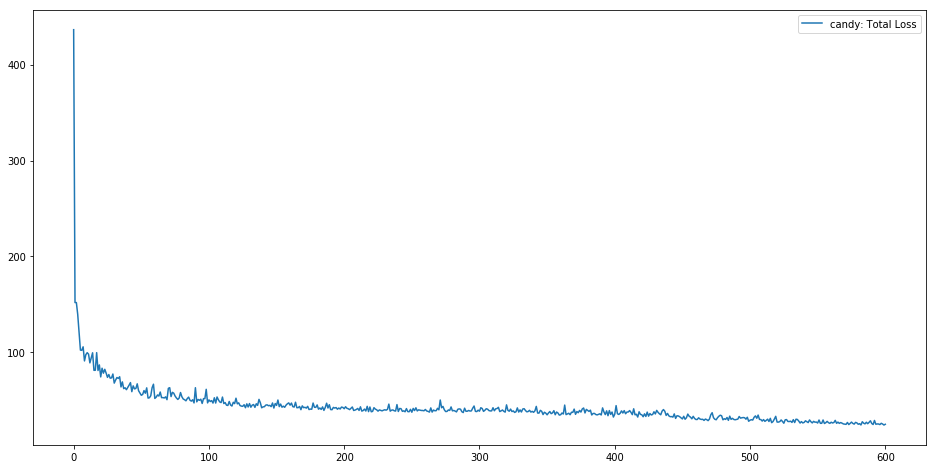

In [5]:
start_loss_at = 0
plt.figure(figsize=(16, 8)) 


for column, network in enumerate(networks):
    file = network['file']
    model = network['model'] 
    checkpoint = network['checkpoint']
    
    # plt.plot(checkpoint['total_variation_loss_history'][start_loss_at:], label=f'{file}: TV Loss')
    # plt.plot(checkpoint['content_loss_history'][start_loss_at:], label=f'{file}: Content Loss')
    # plt.plot(checkpoint['style_loss_history'][start_loss_at:], label=f'{file}: Style Loss')
    plt.plot(checkpoint['loss_history'][start_loss_at:], label=f'{file}: Total Loss')

plt.legend()
plt.show()

Time elapsed calculating the new image: 0.337 sec by candy
Time elapsed calculating the new image: 0.355 sec by candy
Time elapsed calculating the new image: 0.466 sec by candy
Time elapsed calculating the new image: 0.352 sec by candy


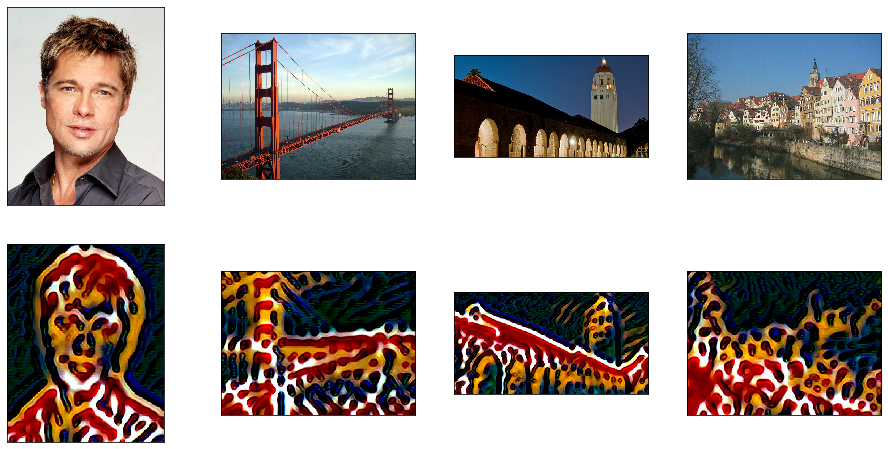

In [6]:
imgs = [
    '../images/content/brad_pitt_01.jpg',
    '../images/content/golden_gate_01.jpg',
    #'/home/christoph/.datasets/coco_super_tiny/train/COCO_test2014_000000000155.jpg',
    #'/home/christoph/.datasets/coco_super_tiny/train/COCO_test2014_000000000229.jpg'
    '../images/content/hoovertowernight_01.jpg',
    '../images/content/tubingen_01.jpg'
]

fig, axes = plt.subplots(len(networks) + 1, len(imgs), figsize=(16, 4 * max(4 - len(imgs), 1) * (len(networks) + 1)), squeeze=False)

for column, img in enumerate(imgs):
    plot_image_tensor(load_image(img), axes[0, column])

for row, network in enumerate(networks):
    file = network['file']
    model = network['model'] 
    checkpoint = network['checkpoint']

    for column, img in enumerate(imgs):
        content_image = load_image(img, 256)
        
        start = time()
        output_image = model(content_image.unsqueeze(0)).squeeze()
        end = time()
        plot_image_tensor(output_image, axes[row + 1, column])
        
        print(f'Time elapsed calculating the new image: {(end - start):,.3f} sec by {file}')

In [7]:
dataset = datasets.ImageFolder(
    '/home/s0555912/.datasets/coco',
    transform=transforms.Compose([
        transforms.Compose([
            transforms.Resize(1280),
            transforms.CenterCrop(1280)
        ]),
        transforms.ToTensor()
    ])
)

sampler = data.RandomSampler(dataset)

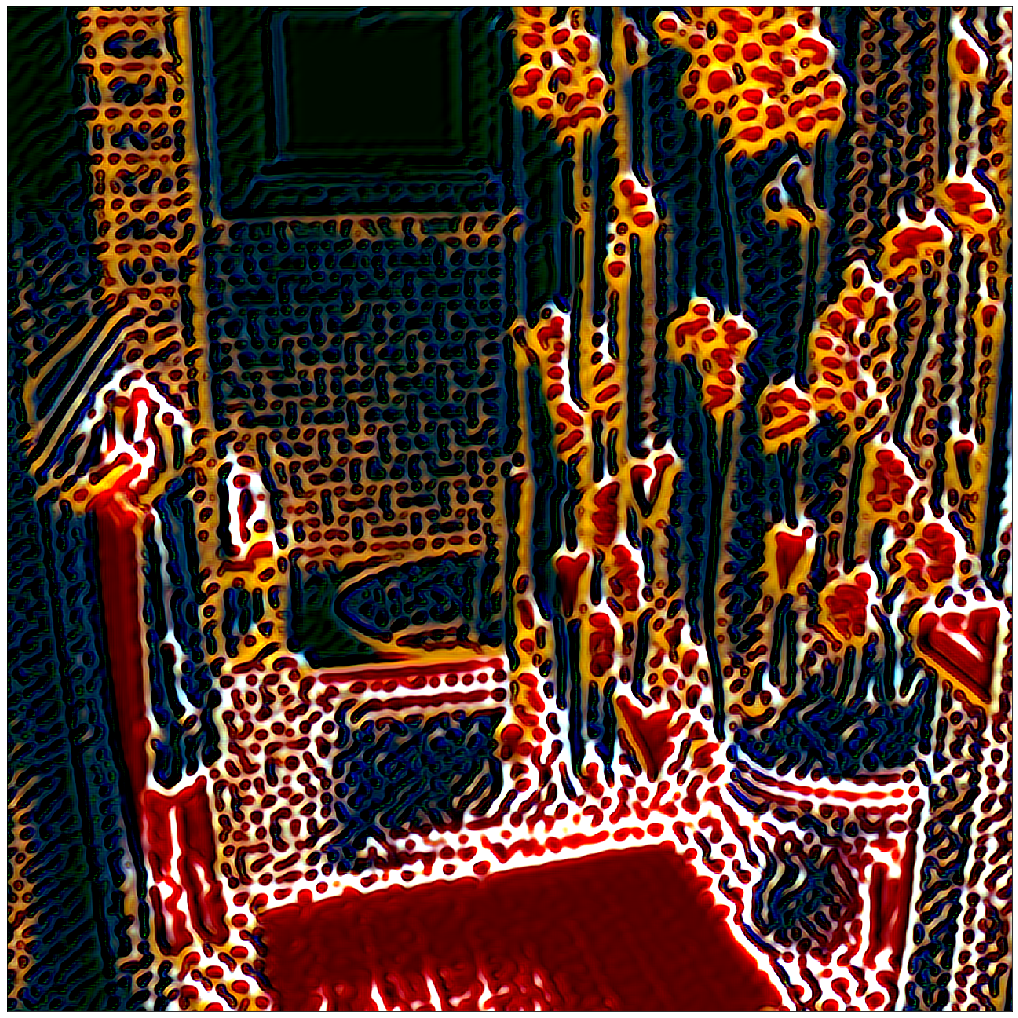

In [8]:
input_image = dataset[next(iter(sampler))][0]


fig, ax = plt.subplots(1, figsize=(18, 20))
output_image = model(content_image.unsqueeze(0)).squeeze()
plot_image_tensor(input_image, ax, show=True)


for network in networks:
    file = network['file']
    model = network['model'] 
    checkpoint = network['checkpoint']

    fig, ax = plt.subplots(1, figsize=(18, 20))
    output_image = model(input_image.unsqueeze(0)).squeeze()
    plot_image_tensor(output_image, ax, show=True)